<a href="https://www.kaggle.com/code/jarredpriester/unsupervised-recommendation-system-of-the-beatles?scriptVersionId=103713169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Unsupervised Recommendation System of The Beatles 
### 7/30/22
### Jarred Priester

1. **Introduction**
    * 1.1 Overview
    * 1.2 The dataset

2. **Downloading the data**
    * 2.1 Importing the libraries
    * 2.2 Downloading the data

3. **Exploring the data**
    * 3.1 Checking for missing data
    * 3.2 Data types
    * 3.3 Data visualization
    * 3.4 Varience

4. **Our first model**
    * 4.1 Choosing the features
    * 4.2 Choosing the k in kmeans
    * 4.3 The kmeans algorithm

5. **Our second model**
    * 5.1 Choosing the features
    * 5.2 Choosing the k in kmeans
    * 5.3 The kmeans algorithm

6. **Recommendations**
    * 6.1 Building a recommendation algorithm
    * 6.2 Recommendations of a few popular Beatle songs

7. **Conclusion**

# 1. Introduction

### 1.1 Overview

In this notebook we will be using unsupervised learning and data visualization to analyze The Beatles! We will be using data from Spotify to sort the songs into different song types and see what kind of music The Beatles created and how their music changed over time. We will create two models using the k-means algorithm to sort the songs into different types. We will then use one of those models to create a recommendation system and make a few recommendations. By the end of this notebook you will be able to find your favorite Beatles song and see how it compares to other Beatles songs and maybe even find a new favorite Beatles song!

### 1.2 The dataset

This dataset consists of 193 songs from all 13 of the Beatles albums. A total of 11 features which include:
* id - the id of the song for this dataset
* year - the year in which the song and album were released
* album - name of the album on which the song appeared
* song - name of the song
* danceability - how likely might someone want to dance when hearing the song
* energy - the overall energy of the song
* speechiness - how many unique words appear in the song
* acousticness - how much the instruments are acoustic in sound
* liveness - how much the song sounds like a live recording
* valence - the positive vibe of the song
* duration_ms - duration of the songs in milliseconds

# 2. Downloading the data

### 2.1 Importing the libraries

In [1]:
#importing the libraries we will be needing for this notebook
import numpy as np 
import pandas as pd 

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import plot
import seaborn as sns
import plotly.express as px

#Kmean clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#for calulating distance
from scipy.spatial import distance

#names of files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/allbeatlesspotifysongdata2009remaster/TheBeatlesGlobalYears.csv
/kaggle/input/allbeatlesspotifysongdata2009remaster/TheBeatlesCleaned.csv
/kaggle/input/allbeatlesspotifysongdata2009remaster/TheBeatlesSongs.csv
/kaggle/input/allbeatlesspotifysongdata2009remaster/TheBeatlesWrkbk.xlsx
/kaggle/input/allbeatlesspotifysongdata2009remaster/TheBeatlesRaw.csv
/kaggle/input/allbeatlesspotifysongdata2009remaster/TheBeatlesEarlyYears.csv


### 2.2 Downloading the dataset

In [2]:
#downloading the beatles spotify songs
beatles = pd.read_csv("../input/allbeatlesspotifysongdata2009remaster/TheBeatlesCleaned.csv")

#taking a look at our data
beatles

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080
4,5,1963,Please Please Me,Boys,0.402,0.86,0.0504,0.6070,0.7360,0.822,146440
...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213


The data has now been downloaded. It is time to explore the data!

# 3. Exploring the data

### 3.1 Checking for missing data

In [3]:
#checking to see if there are any missing values
beatles.isna().sum()

id              0
year            0
album           0
song            0
danceability    0
energy          0
speechiness     0
acousticness    0
liveness        0
valence         0
duration_ms     0
dtype: int64

### 3.2 Data types

In [4]:
#checking the data types for each feature
beatles.dtypes

id                int64
year              int64
album            object
song             object
danceability    float64
energy           object
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
dtype: object

We can see that the energy feature is an object, but we want it to be a float64 like the rest of the song features. So we will change from object to float64

In [5]:
#chaning energy from object to float64
beatles['energy'] = beatles['energy'].str.replace(')','').astype(np.float64)

#checking the data types again to make sure the changes were made
beatles.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


id                int64
year              int64
album            object
song             object
danceability    float64
energy          float64
speechiness     float64
acousticness    float64
liveness        float64
valence         float64
duration_ms       int64
dtype: object

### 3.3 Data visualization

The Beatles released their first album in 1963 and would go on to release 12 more albums in a 7 year period from 1963 to 1970. Below is a histogram of the number of songs on each album, starting on the left with their first album *Please Please Me* and ending on the right with their final album *Let it Be*.

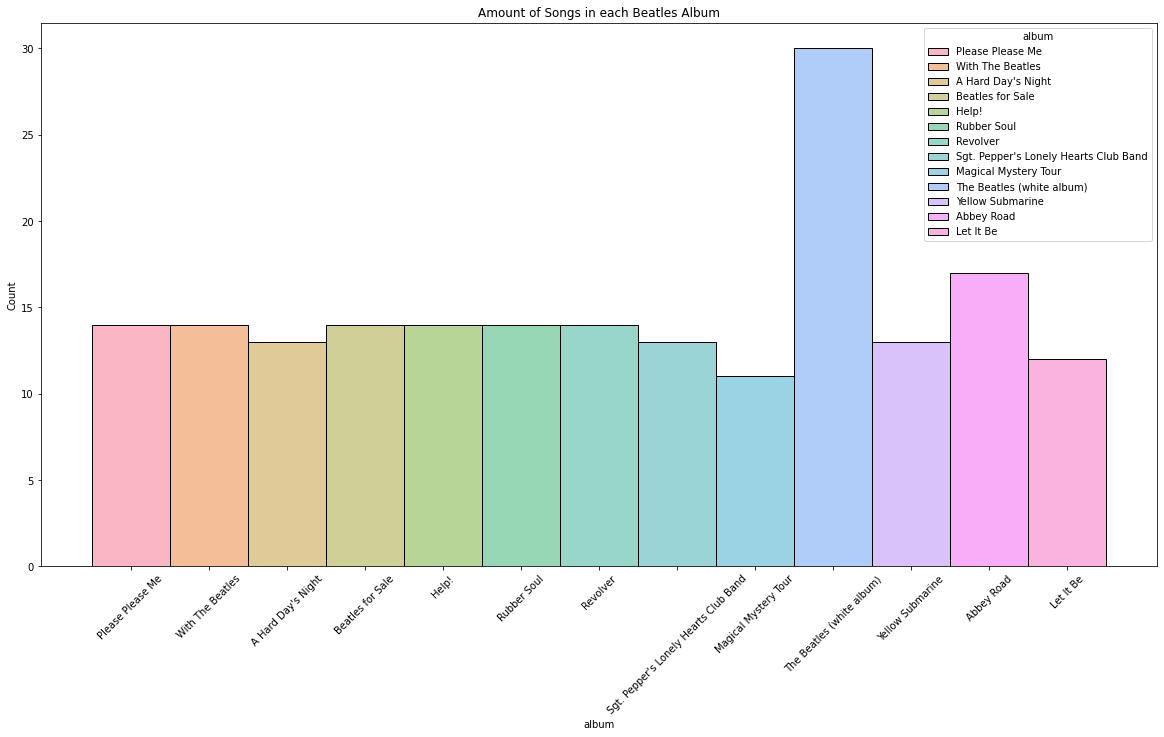

In [6]:
#creating a histogram of the beatles albums
plt.figure(figsize = (20,10))
p1 = sns.histplot(data=beatles, x='album', hue='album', legend=True)
p1.set(title='Amount of Songs in each Beatles Album')
plt.xticks(rotation=45)
plt.show()

Next we will use the seaborn library to show the pairplot of the data. This will give us a visual of how each feature relates to each other. This will come in handy later when we will need to select features for our models.

<Figure size 1440x864 with 0 Axes>

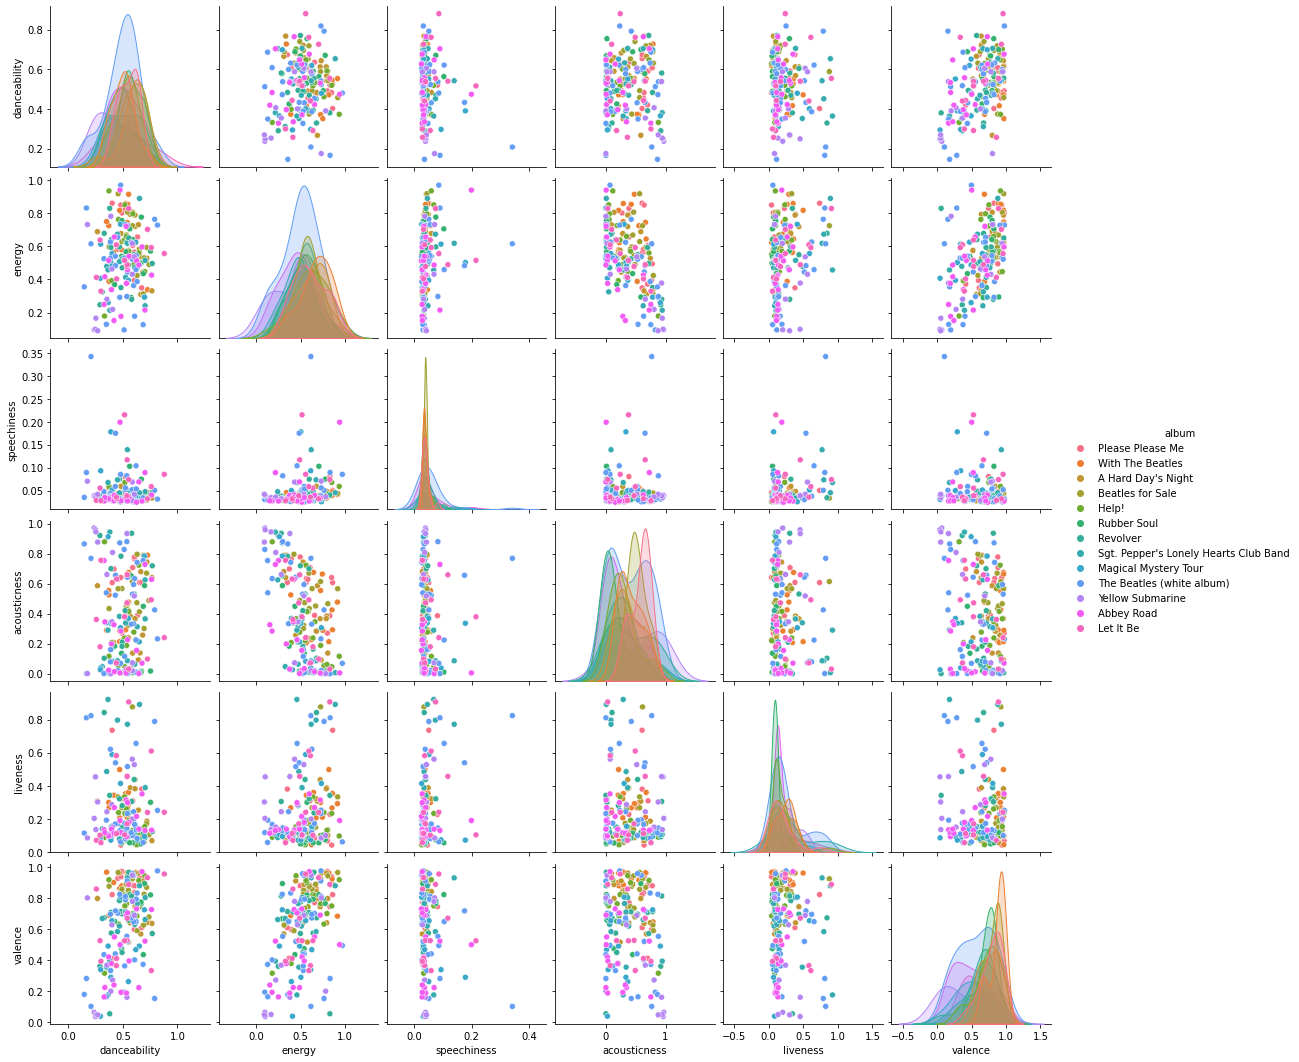

In [7]:
#creating a pairwise plot of all numeric features
plt.figure(figsize = (20,12))
p2 = sns.pairplot(data=beatles[['album','danceability','energy','speechiness','acousticness','liveness','valence']], hue='album')
plt.show()

### 3.4 Variance

In order to help us select features, we are going to calculate the statistical variance of the song's features. This will show us how closely the features are clustered together, the higher the score will mean that the data is more spread out and that is what we are looking for.

In [8]:
#finding the statistical variance using the numpy library and rounding to the third decimal
variance = round(np.var(beatles[['danceability','energy','speechiness','acousticness','liveness','valence']]),3)
variance

danceability    0.019
energy          0.037
speechiness     0.001
acousticness    0.082
liveness        0.040
valence         0.063
dtype: float64

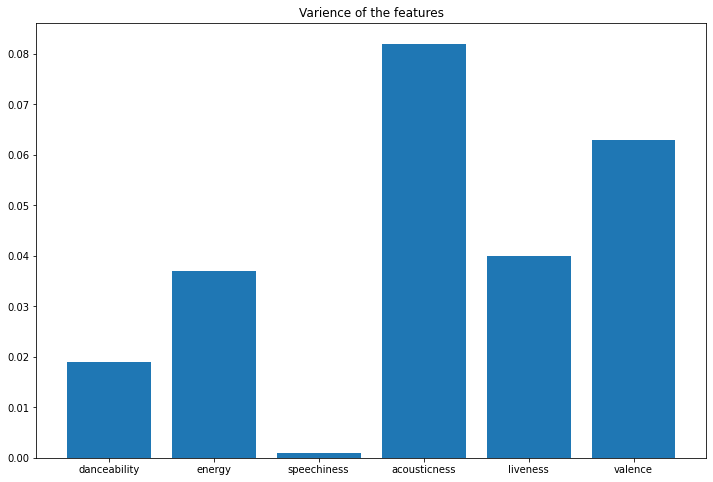

In [9]:
#creating a bar graph of the variance scores
plt.figure(figsize = (12,8))
plt.bar(['danceability','energy','speechiness','acousticness','liveness','valence'],variance)
plt.title('Varience of the features' )
plt.show()

The acousticness feature has the most variance, while the speechiness feature has the least. We can see this visually from the pairplot as well. 

# 4. Our first model

### 4.1 Choosing the features

Our first model will be two dimensional, so we will need to pick two features. Using both the variance score and the pairplot to help us choose, we will be using the acousticness and valence features. Let us take a look at how this looks on an interactive scatterplot.

In [10]:
#creating an interactive scatter plot of the acousticness and valence features
px.scatter(beatles,x='acousticness',y='valence',color='album',hover_data=['song','album','year'],title='Scatterplot of acousticness and valence')

### 4.2 Choosing the k in kmeans

Next we will need to decide how many clusters we want the algorithm to sort the data into. To do this we will be using two different methods, the elbow method and silhouette method.

### The elbow method

The elbow method is a popular way to determine how many clusters to use for the kmeans algorithm. It starts with calculating the inertia of the data which is the sum of squared distances of samples to their closest cluster center. From there we plot the inhertia value, we then choose the 'elbow', which is the last point before the plot turns linear.


In [11]:
#creating a list of inertia  scores
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(beatles[['acousticness','valence']])
    inertia.append(kmeans.inertia_)
inertia

[27.963633352264374,
 15.693219367622039,
 10.674942776343693,
 6.666469719520014,
 5.229953671255427,
 4.3367740299790265,
 3.6691100474013787,
 3.0409893609250696,
 2.6167584397564356,
 2.2639786398382484]

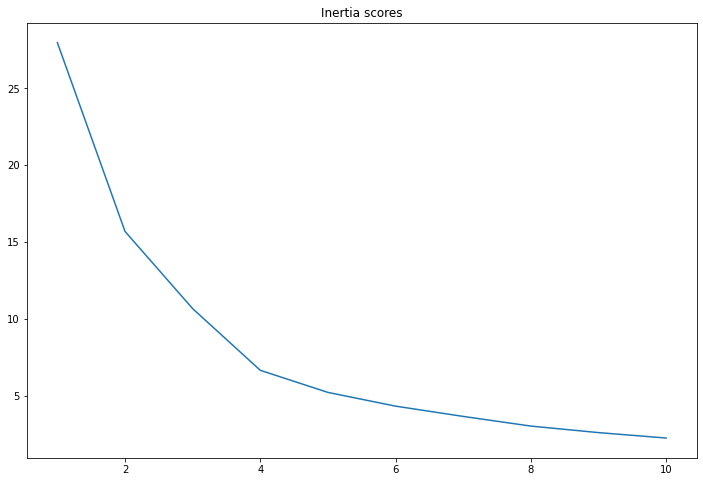

In [12]:
#creating a line graph of the inertia scores
plt.figure(figsize = (12,8))
plt.plot(range(1,11),inertia)
plt.title('Inertia scores')
plt.show()

In this case, the optimal number of clusters is 4.

### The silhouette method

In [13]:
#creating a list of silhouette scores
silhouette = []
for n in range(2,11):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(beatles[['acousticness','valence']])
    score = silhouette_score(beatles[['acousticness','valence']],kmeans.labels_)
    silhouette.append(score)
silhouette

[0.4135173432369361,
 0.38198417348500874,
 0.4268407003454385,
 0.4078696251098603,
 0.40447224607595605,
 0.4104752721947203,
 0.4301068148702807,
 0.4404286899325869,
 0.42005674923666037]

Text(0.5, 1.0, 'silhouette scores')

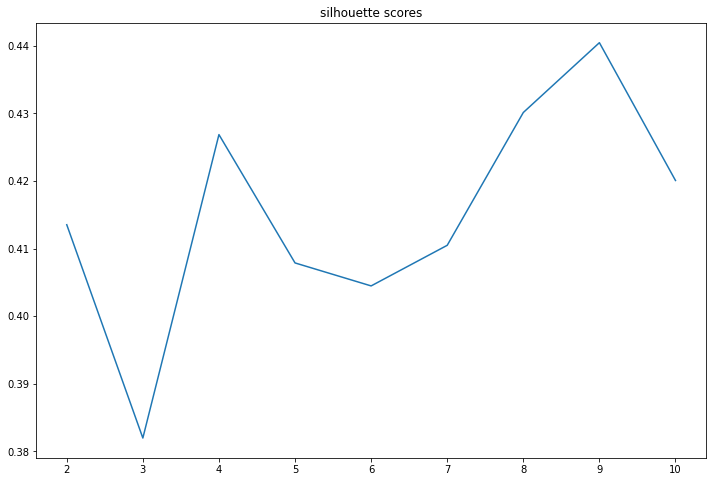

In [14]:
#ploting the silhouette scores
plt.figure(figsize = (12,8))
plt.plot(range(2,11),silhouette)
plt.title('silhouette scores')

The plot shows that 4 and 9 have high silhouette scores. Since 4 clusters was optimal with the elbow method and also has a high silhouette score, we will be using 4 clusters for this model. 

### 4.3 The kmeans algorithm

Now that the two features have been selected and the number of cluster have been determined, it is time to apply these to our first kmeans model.

In [15]:
#running the kmean algorithm and creating a new feature with the predicted cluster
kmeans = KMeans(n_clusters = 4, random_state=7)
beatles['cluster'] = kmeans.fit_predict(beatles[['acousticness','valence']])
beatles

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,cluster
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947,1
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547,3
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133,3
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080,3
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.6070,0.7360,0.822,146440,3
...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560,0
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960,1
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187,2
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213,1


In [16]:
#creating a interactive scatter plot with all four clusters
px.scatter(beatles,x='acousticness',y='valence',color= 'cluster',hover_data=['song','album','year'],title='The Fab Four Clusters')

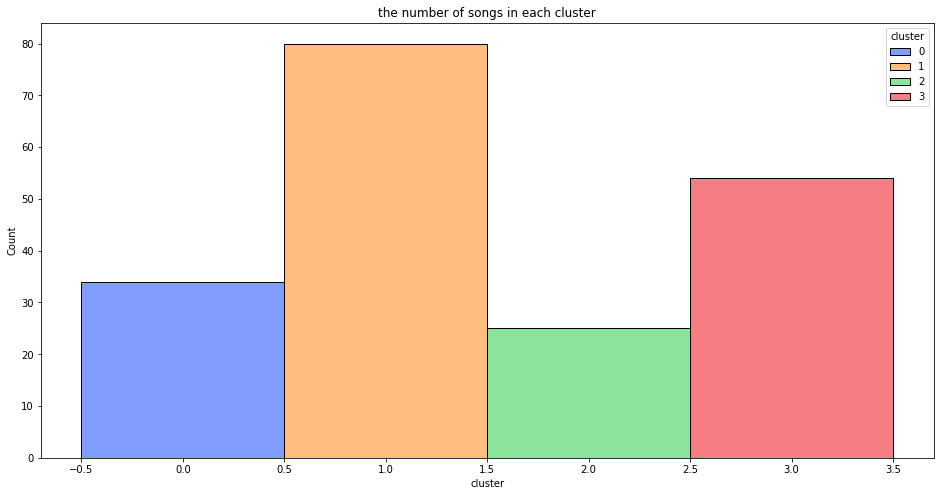

In [17]:
#creating a bar chart with the amount of songs in each cluster
plt.figure(figsize = (16,8))
p1 = sns.histplot(data=beatles, x='cluster', hue='cluster', legend=True, palette='bright',discrete=True, binwidth=10)
plt.title('the number of songs in each cluster')
plt.show()

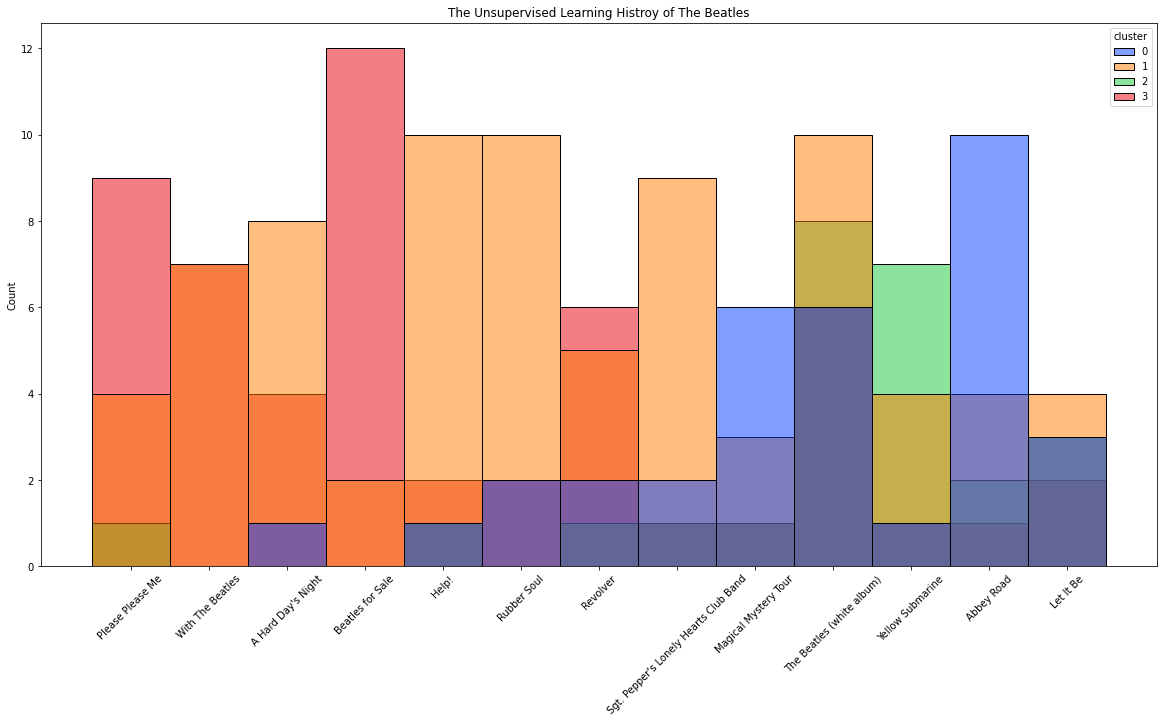

In [18]:
#creating a layered histogram of cluster in each album
plt.figure(figsize = (20,10))
p1 = sns.histplot(data=beatles, x='album', hue='cluster', legend=True, palette='bright')
p1.set(xlabel=None)
plt.xticks(rotation=45)
plt.title('The Unsupervised Learning Histroy of The Beatles')
plt.show()

With this layered histogram we can see the rise of the 0 cluster in the second half of their albums. I like to think of this 0 cluster as the “Strawberry Fields Forever” cluster. In other words, this cluster consists of their more experimental / complex songs. The data suggests the band grew in complexity over time, which we know to be true.

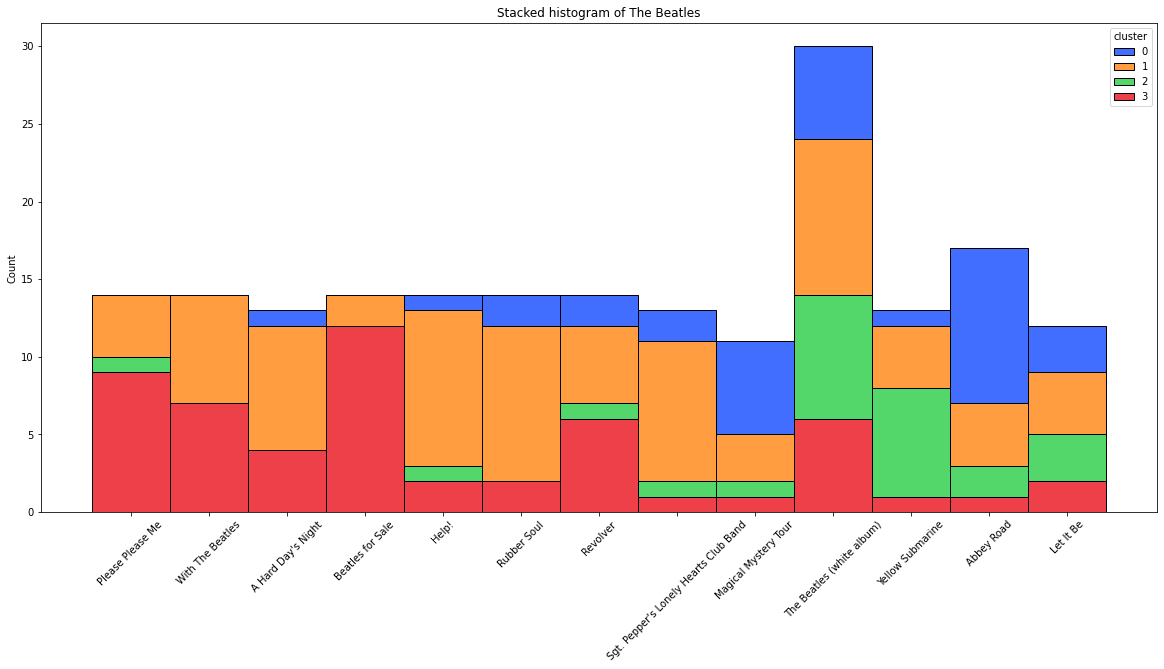

In [19]:
#creating a stacked histogram of the cluster in each album
plt.figure(figsize = (20,9))
p1 = sns.histplot(data=beatles, x='album', hue='cluster', legend=True, palette='bright', multiple='stack')
p1.set(xlabel=None)
plt.xticks(rotation=45)
plt.title('Stacked histogram of The Beatles')
plt.show()

# 5. Our second model

### 5.1 Choosing the features

Our second model will be similar to our first model but this one will have three dimensions. Again, we will use the variance as a guide and we will add liveness as our third dimension. 

In [20]:
#creating a interactive 3D scatter plot of the acousticness, valence, liveness features
px.scatter_3d(beatles,x='acousticness',y='valence',z='liveness',color='album',hover_data=['song','album','year'],title='Scatterplot of acousticness, valence and liveness')

### 5.2 Choosing the k in kmeans

### The Elbow Method

In [21]:
#creating a list of the inertia score from the 3 features
inertia = []
for n in range(1,11):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(beatles[['acousticness','valence','liveness']])
    inertia.append(kmeans.inertia_)
inertia

[35.67581969257525,
 23.40539025776853,
 18.36003224368108,
 14.316405600944481,
 10.79931803915159,
 9.38809943012369,
 8.193474700762952,
 7.286421725243689,
 6.4360835003377375,
 6.027757692593439]

Text(0.5, 1.0, 'second model inertia score')

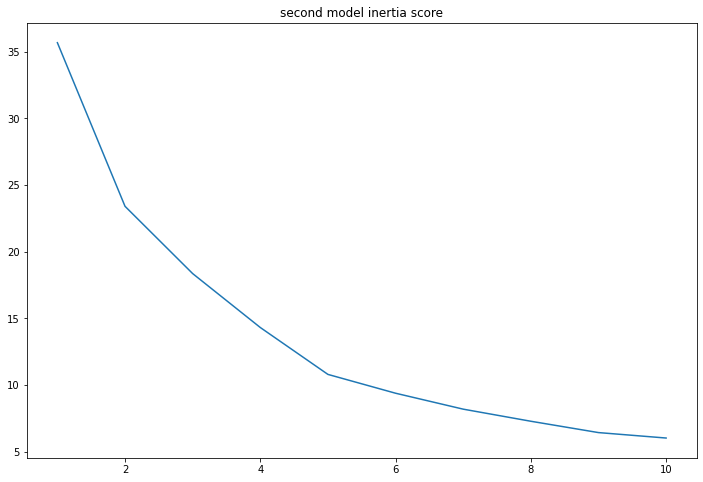

In [22]:
#ploting a line graph of the inertia scores
plt.figure(figsize = (12,8))
plt.plot(range(1,11),inertia)
plt.title('second model inertia score')

The elbow method optimal cluster is 5.

### Silhouette Method

In [23]:
silhouette = []
for n in range(2,11):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(beatles[['acousticness','valence','liveness']])
    score = silhouette_score(beatles[['acousticness','valence','liveness']],kmeans.labels_)
    silhouette.append(score)
silhouette

[0.33647891583114753,
 0.2893105444159598,
 0.31159435186123724,
 0.34221810952166015,
 0.31798127270041576,
 0.3316038075791302,
 0.3269596082201318,
 0.34228186710982583,
 0.33984191362371086]

Text(0.5, 1.0, 'Second model silhouette method')

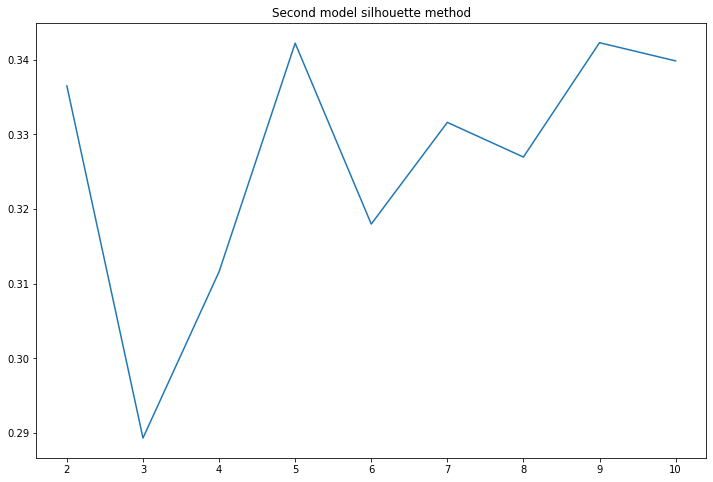

In [24]:
#plotting the silhouette score for the 3 features
plt.figure(figsize = (12,8))
plt.plot(range(2,11),silhouette)
plt.title('Second model silhouette method')

Both the elbow method and silohouette method suggest the optimal number of clusters is 5 and that is what we will go with.

### 5.3 The kmeans algorithm

In [25]:
#creating the kmeans algorithm with 3 features and 5 clusters
kmeans = KMeans(n_clusters = 5, random_state=7)
beatles['cluster2'] = kmeans.fit_predict(beatles[['acousticness','valence','liveness']])
beatles

,id,year,album,song,danceability,energy,speechiness,acousticness,liveness,valence,duration_ms,cluster,cluster2
0,1,1963,Please Please Me,I Saw Her Standing There,0.491,0.801,0.0361,0.2700,0.0665,0.971,173947,1,4
1,2,1963,Please Please Me,Misery,0.591,0.605,0.0413,0.7070,0.3090,0.882,108547,3,2
2,3,1963,Please Please Me,Anna,0.608,0.565,0.0336,0.6350,0.0601,0.835,177133,3,2
3,4,1963,Please Please Me,Chains,0.654,0.561,0.0304,0.6080,0.1290,0.929,145080,3,2
4,5,1963,Please Please Me,Boys,0.402,0.860,0.0504,0.6070,0.7360,0.822,146440,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1970,Let It Be,ive got a feeling,0.440,0.609,0.0358,0.0715,0.5820,0.364,217560,0,0
189,190,1970,Let It Be,one after 909,0.554,0.828,0.0739,0.0307,0.9070,0.888,173960,1,0
190,191,1970,Let It Be,the long and winding road,0.299,0.329,0.0279,0.7560,0.0559,0.392,218187,2,3
191,192,1970,Let It Be,for you blue,0.880,0.556,0.0855,0.2400,0.2400,0.955,152213,1,4


In [26]:
#creating a 3D scatter plot with the 5 new clusters
px.scatter_3d(beatles,x='acousticness',y='valence',z= 'liveness',color= 'cluster2',hover_data=['song','album','year'],title='The Fab Five Clusters in 3D')

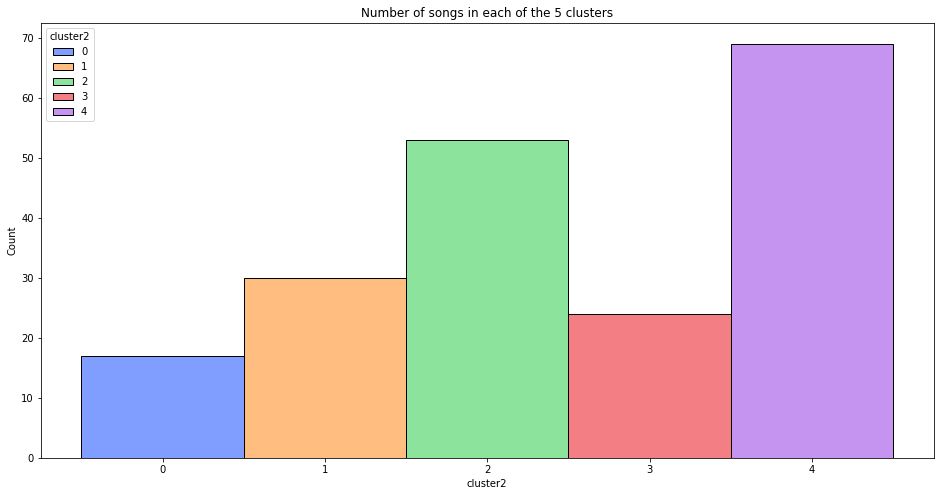

In [27]:
#creating a histogram with the number of songs in each cluster
plt.figure(figsize = (16,8))
p1 = sns.histplot(data=beatles, x='cluster2', hue='cluster2', legend=True, palette='bright',discrete=True, binwidth=10)
plt.title('Number of songs in each of the 5 clusters')
plt.show()

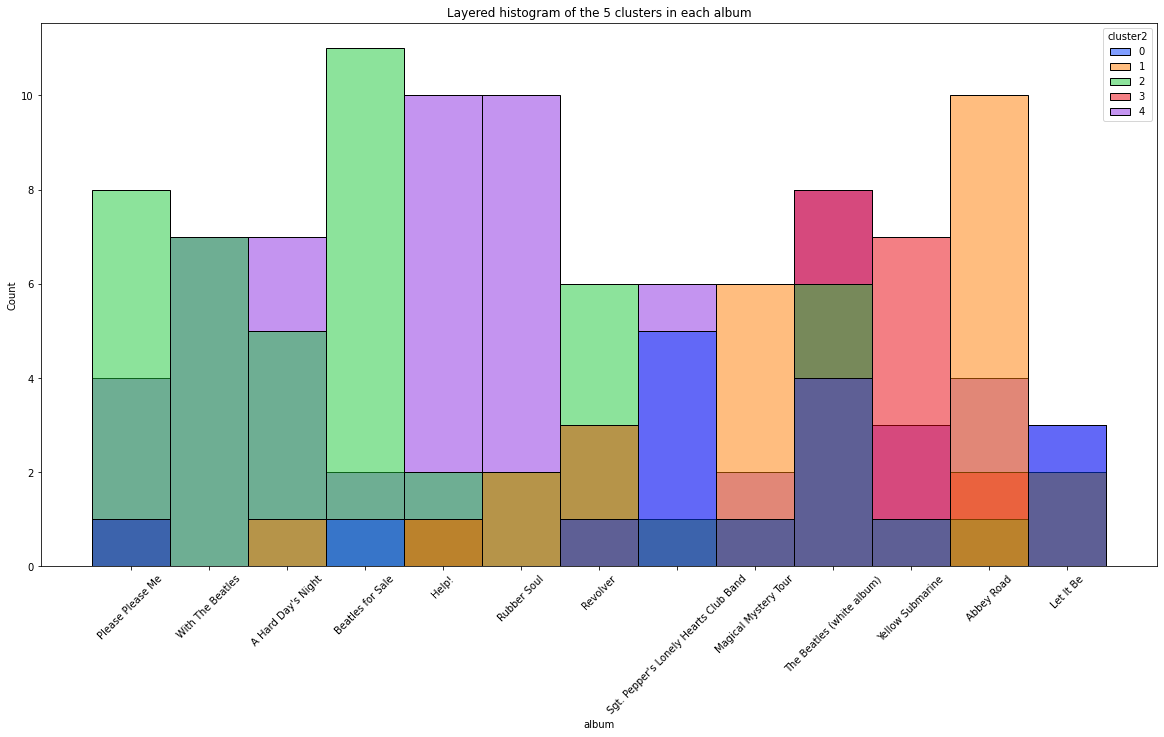

In [28]:
#layered histogram of the 5 clusters in each album
plt.figure(figsize = (20,10))
p1 = sns.histplot(data=beatles, x='album', hue='cluster2', legend=True, palette='bright')
plt.xticks(rotation=45)
plt.title('Layered histogram of the 5 clusters in each album')
plt.show()

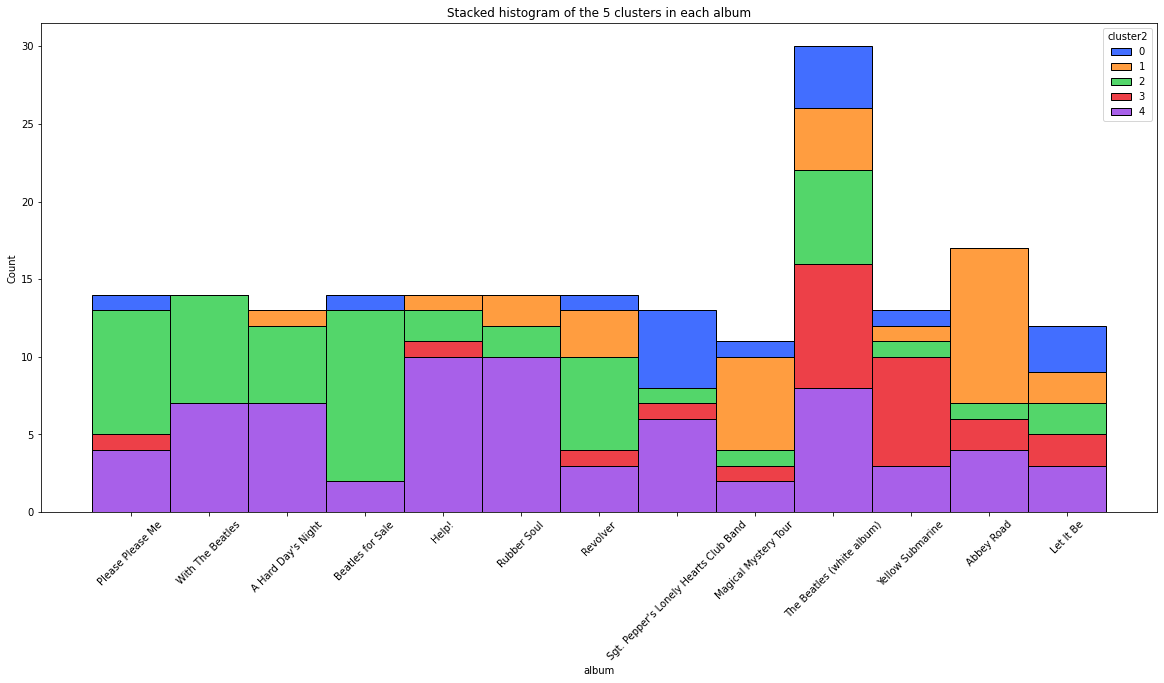

In [29]:
#Stacked histogram of the 5 clusters in each album
plt.figure(figsize = (20,9))
p1 = sns.histplot(data=beatles, x='album', hue='cluster2', legend=True, palette='bright', multiple='stack')
plt.xticks(rotation=45)
plt.title('Stacked histogram of the 5 clusters in each album')
plt.show()

# 6. Recommendations

### 6.1 Building a recommendations algorithm

We are going to use the second model we created to make recommendations. We will start with creating a function that will return the song that has the closest euclidean distance to the song provided.

In [30]:
#creating a function that will return the song that is closest to the given song
def song_recommendation(name):
    recommendation = []
    a = beatles.loc[beatles['song']==name][['acousticness','liveness','valence']]
    a = np.array(a)
    for num in beatles['id']:
        b = beatles.loc[beatles['id']==num][['acousticness','liveness','valence']]
        b = np.array(b)
        c = distance.euclidean(a,b)
        recommendation.append([beatles.loc[beatles['id']==num]['song'],c])
        recommendation.sort(key=lambda a: a[1])
    return recommendation[1]

### 6.2 Recommendations of a few popular Beatles songs

Now that we have a function that will provide us with recommendations, we will create a list of the songs in the dataset. Then we can use that list of songs and choose some of our favorites.

In [31]:
#creating a list of all the songs in the dataset
songs = []
for i in beatles['song']:
        songs.append(i)
songs

['I Saw Her Standing There',
 'Misery',
 'Anna',
 'Chains',
 'Boys',
 'Ask Me Why',
 'Please Please Me',
 'Love Me Do',
 'P.S. I Love You',
 "Baby It's You",
 'Do You Want to Know a Secret',
 'Taste of Honey',
 "There's a Place",
 'Twist and Shout',
 'It Wont Be Long',
 "All I've Got To Do",
 'All My Loving',
 'Don’t Bother Me',
 'Little Child',
 'Till There Was You',
 'Please Mister Postman',
 'Roll Over Beethoven',
 'Hold Me Tight',
 'You Really Got A Hold On Me',
 'I Wanna Be Your Man',
 'Devil In Her Heart',
 'Not A Second Time',
 'Money(That’s What I Want)',
 "A Hard Day's Night",
 'I should Have Known Better',
 'If I Fell',
 'Im Happy Just To Dance With You',
 'And I Love Her',
 'tell me why ',
 'cant buy me love',
 'any time at all',
 'ill cry instead',
 'things we said today',
 'when I get home',
 'you cant do that',
 'ill be back',
 'no reply',
 'im a loser',
 'babys in black',
 'rock and roll music',
 'ill follow the sun',
 'mr.moonlight',
 'kansas city/ Hey-Hey-Hey-Hey',
 'e

Now let us plug the songs into the function and see what songs get recommended!

In [32]:
print(song_recommendation('I Saw Her Standing There'))

[21    Roll Over Beethoven
Name: song, dtype: object, 0.03465097401228425]


In [33]:
print(song_recommendation('All My Loving'))

[59    another girl
Name: song, dtype: object, 0.08452810183601671]


In [34]:
print(song_recommendation('Help!'))

[28    A Hard Day's Night
Name: song, dtype: object, 0.06129469797625241]


In [35]:
print(song_recommendation('yesterday'))

[87    here, there and everywhere
Name: song, dtype: object, 0.061632864609719396]


In [36]:
print(song_recommendation('strawberry field forever'))

[112    flying 
Name: song, dtype: object, 0.04782896611886982]


In [37]:
print(song_recommendation('while my guitar gently weeps'))

[72    nowhere man
Name: song, dtype: object, 0.04814562181548802]


In [38]:
print(song_recommendation('helter skelter'))

[188    ive got a feeling
Name: song, dtype: object, 0.25368476350778346]


In [39]:
print(song_recommendation('come together'))

[155    its all too much 
Name: song, dtype: object, 0.03328970785392987]


In [40]:
print(song_recommendation('something'))

[57    you’ve got to hide your love away
Name: song, dtype: object, 0.03712142238654118]


In [41]:
print(song_recommendation('let it be '))

[140    mother natures son
Name: song, dtype: object, 0.055812185049503305]


I have to admit, these recommendations seem pretty good. They all seem to be very similar to the given songs but are also slighty different. Feel free to give it a try and play around with the recommender!

# 7. Conclusion

We started off with unlabeled song data from all 13 of the Beatles albums. We then explored the data and created both two dimensional and three dimensional interactive charts. We created two unsupervised learning models. We used one of those models to create a simple recommendation system and we were able to make some recommendations as to what Beatles song to listen to next. 

I immensely enjoyed creating this notebook and enjoyed learning a bit more about the Beatles. I hope you had just as much fun reading this notebook as I had creating it. I hope that you are able to get a good recommendation for your next favorite Beatles song. Thank you for reading!